In [256]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_file = "mouse_drug_data.csv"
mouse_data = pd.read_csv("mouse_drug_data.csv")
mouse_data.head()



,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [257]:
clinical_file = "clinicaltrial_data.csv"
clinical_data = pd.read_csv("clinicaltrial_data.csv")
clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [258]:
# Combine the data into a single dataset

merge_table = pd.merge(clinical_data, mouse_data, how = "left",on="Mouse ID")
merge_table

# Display the data table for preview
merge_table.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [259]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response_df = merge_table.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
tumor_df = pd.DataFrame(tumor_response_df).reset_index()

# Preview DataFrame
tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [260]:
 # Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

tumor_response_df = merge_table.groupby(['Drug','Timepoint'])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_response_df = pd.DataFrame(tumor_response_df).reset_index()

# Preview DataFrame
tumor_response_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [261]:
# Minor Data Munging to Re-Format the Data Frames

reformat = tumor_df.pivot(index = "Timepoint", columns= "Drug", values="Tumor Volume (mm3)")
std_error_vtime = tumor_response_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
# Preview that Reformatting worked

std_error_vtime.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [262]:
drug_list = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
plotStyleDict = {"Capomulin":"ro:", "Infubinol":"b^:", "Ketapril":"gs:", "Placebo": "kd:"}  

KeyError: 'Capomulin'

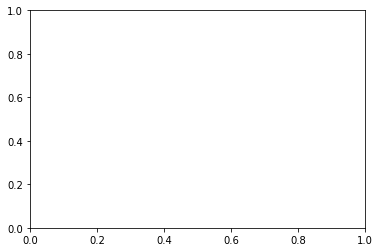

In [263]:
# Generate the Plot (with Error Bars)

fig1, ax1 = plt.subplots()
for drug in drug_list:
    ax1.errorbar(tumor_df.index, tumor_df[drug], std_error_vtime[drug], fmt = plotStyleDict[drug])
    ax.legend()
    plt.grid(True)
    plt.title("Tumor Response to Treatment")
    plt.xlabel("Time (Days)")
    plt.ylabel("Tumor Volume (mm3)")


#Save plot 
plt.savefig("TResp2Treatment.png")
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [264]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metas_resp = merge_table.groupby(["Drug", "Timepoint"])['Metastatic Sites'].mean()
# Convert to DataFrame
metas_resp = pd.DataFrame(metas_resp).reset_index()
# Preview DataFrame
metas_resp.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [265]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
std_errormetas =merge_table.groupby(["Drug", "Timepoint"])['Metastatic Sites'].sem()
# Convert to DataFrame
std_errormetas =pd.DataFrame(std_errormetas).reset_index()
# Preview DataFrame
std_errormetas.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [266]:
# Minor Data Munging to Re-Format the Data Frames
metas_reformat = metas_resp.pivot(index= "Timepoint", columns= "Drug", values= "Metastatic Sites")
std_error_metas = std_errormetas.pivot(index= "Timepoint", columns= "Drug", values= "Metastatic Sites")
# Preview that Reformatting worked
metas_reformat

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

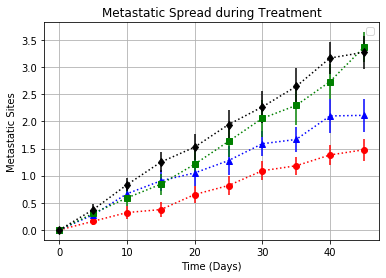

In [267]:
# Generate the Plot (with Error Bars)

fig2, ax2 = plt.subplots()
for drug in drug_list:
    ax2.errorbar(metas_reformat.index, metas_reformat[drug],
             std_error_metas[drug], fmt=plotStyleDict[drug])

ax2.legend()
plt.grid(True)
plt.title('Metastatic Spread during Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Metastatic Sites')


# Save the Figure
plt.savefig("Metastaticresp2Treatment.png")
# Show the Figure
plt.show

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [268]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rates = merge_table.groupby(["Drug", "Timepoint"])['Mouse ID'].count()

# Convert to DataFrame
survival_rates = pd.DataFrame(survival_rates).reset_index()
survival_rates = survival_rates.rename(columns = {"Mouse ID":"Mouse Count"})

# Preview DataFrame
survival_rates.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [269]:
# Minor Data Munging to Re-Format the Data Frames
survival_reformat = survival_rates.pivot (index = "Timepoint", columns="Drug", values="Mouse Count")
# Preview the Data Frame
survival_reformat

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


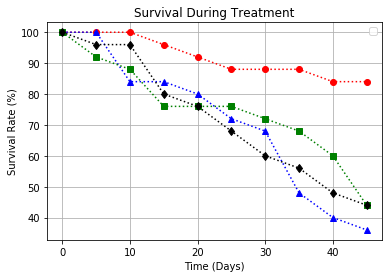

In [270]:
# Generate the Plot (for percentages)
survival_rateplot = pd.DataFrame()
for col in survival_reformat.columns:
    survival_rateplot[col] = 100 * survival_reformat[col]/25

fig3, ax3 = plt.subplots()
for drug in drug_list:
    plt.plot(survival_rateplot.index, survival_rateplot[drug], plotStyleDict[drug])
    plt.grid(True)
    ax3.legend()
    plt.title("Survival During Treatment")
    plt.xlabel("Time (Days)")
    plt.ylabel("Survival Rate (%)")

# Save the Figure
plt.savefig("Survivalrates.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [271]:
# Calculate the percent changes for each drug
percentage_change = (reformat.iloc[9, :] - reformat.iloc[0,:])/reformat.iloc[0,:] * 100

# Display the data to confirm
print(percentage_change)

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64


In [272]:
percent_change = percentage_change.to_frame()
percent_change = percent_change.rename(columns = {0 : "Percent Change"})
percent_change["Pass"] = (percent_change < 0)

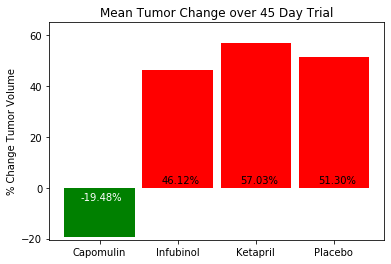

In [273]:

fig4, ax4 = plt.subplots()
x = 0

for drug in drug_list:
    y = percent_change.loc[drug, "Percent Change"]
    if percent_change.loc[drug, "Pass"] == True:
        ax4.bar(drug, y, width = .9, color = "g")
        plt.text(x-.25, -5, '{:.2f}%'.format(y), color = "white")
    else:
        ax4.bar(drug, y, width = .9, color = "r")
        plt.text(x-.2, 2, '{:.2f}%'.format(y), color = "black")
    x = 1 + x
    plt.yticks((-20, 0, 20, 40, 60))
    ax4.yaxis.grid()
    plt.title("Mean Tumor Change over 45 Day Trial")
    plt.ylabel("% Change Tumor Volume")
    plt.ylim(ymax = 65)

plt.savefig("TumorChange.png")

plt.show()

![Metastatic Spread During Treatment](../Images/change.png)

##  Include 3 observations about the results of the study. Use the visualizations you generated from the study data as the basis for your observations.



#### 1.- I couldnt generate the first chart but based on the the information pulled,  the Tumor Volume decreased about 19% with the treatment called Camopulin.  The other three treatments; Infubinol, Ketapril increased the Tumor volume; 46.12%, 57.03% and 51.30% respectively

#### 2.- The Metastaic spread with all the treatments, however I can see that with Capomulin the Metastaic sppread the least versus the Placebo that increased considerately

#### 3.- We can compare the Survival Rate by looking at the last chart, Capomulin shows a higher survival rate than the rest of the treatments. The treatment with the lowest rate is Ketapril. 